<a href="https://colab.research.google.com/github/PIRomanCod/DataSciense_HW/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вправа з роботи з даними за Топ-50 рейтингом книг на Amazon

**Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com. Завантажте файл csv за [посиланням]("https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019") і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук (для зручності). Після цього переходьте до завдання.**

**Для виконання цієї частини домашнього завдання потрібно буде не тільки написати код, а й відповісти на супутні запитання. Там, де ви побачите виділений жирним шрифтом напис відповідь: потрібно буде вставити питання у файл і відповідь на нього.**


*Наприклад:*

**Яка бібліотека використовується для роботи з датафреймами у python?** \
**Відповідь:** *pandas*

*Необхідно виконати:*

**Прочитайте csv файл (використовуйте функцію read_csv):**





In [1]:
import pandas as pd
import seaborn as sns

books = pd.read_csv("/content/bestsellers with categories.csv")
books

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


- Виведіть перші п'ять рядків (використовується функція head)

In [2]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


- Виведіть розміри датасету (використовуйте атрибут shape)

In [4]:
books.shape

(550, 7)

**Про скільки книг зберігає дані датасет??** \
**Відповідь:** *550*

Для кожної з книг доступні 7 змінних (колонок). Давайте розглянемо їх детальніше:

Name - назва книги

Author - автор

User Rating - рейтинг (за 5-бальною шкалою)

Reviews - кількість відгуків

Price - ціна (у доларах станом на 2020 рік)

Year - рік, коли книга потрапила до рейтингу Топ-50

Genre - жанр

Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [5]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


## Первинне дослідження даних
Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [6]:
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

**Чи є в якихось змінних пропуски?** \
**Відповідь:** *ні*

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [7]:
books["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

**Які є унікальні жанри?** \
**Відповідь:** *'Non Fiction', 'Fiction'*

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

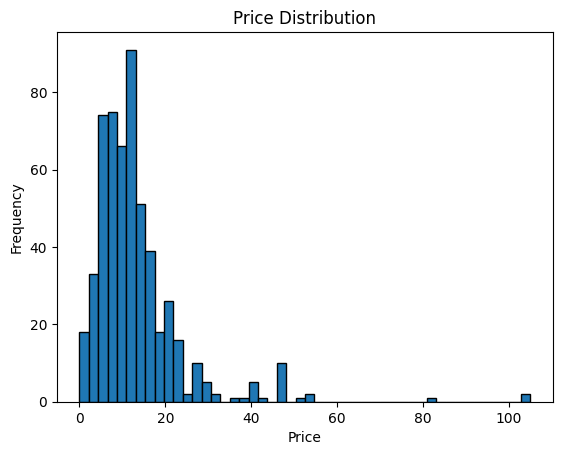

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(books['price'], bins='auto', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [9]:
max_price = books['price'].max()
min_price = books['price'].min()
mean_price = books['price'].mean()
median_price = books['price'].median()

Максимальна ціна?

In [15]:
print(max_price)

105


Мінімальна ціна?

In [16]:
print(min_price)

0


Середня ціна?

In [17]:
print(mean_price)

13.1


Медіанна ціна?

In [14]:
print(median_price)

11.0


## Пошук та сортування даних

**Який рейтинг у датасеті найвищий?** \



In [19]:
max_rating = books['user_rating'].max()
print("Відповідь:", max_rating)

Відповідь: 4.9


**Скільки книг мають такий рейтинг?** \

In [20]:
book_with_max_rating = books[books['user_rating'] == max_rating]['name'].values
print("Відповідь:", len(book_with_max_rating))

Відповідь: 52


**Яка книга має найбільше відгуків?** \

In [21]:
max_reviews = books['reviews'].max()
book_with_max_reviews = books[books['reviews'] == max_reviews]['name'].values[0]
print("Відповідь:", book_with_max_reviews)

Відповідь: Where the Crawdads Sing


**З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?** \

In [24]:
top_2015_books = books[books['year'] == 2015]
sorted_top_2015_books = top_2015_books.sort_values(by='price', ascending=False)

print("Відповідь:", sorted_top_2015_books["name"].iloc[0], ",", sorted_top_2015_books["price"].iloc[0],"USD")

Відповідь: Publication Manual of the American Psychological Association, 6th Edition , 46 USD


**Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?** \

In [25]:
fiction_books = books[(books['year'] == 2010) & (books['genre'] == "Fiction")]
print("Відповідь:", len(fiction_books))

Відповідь: 20


**Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?** \

In [26]:
top_2010_2011 = books[(books['user_rating'] == 4.9) & (books['year'].isin([2010, 2011]))]

print("Відповідь:", len(top_2010_2011))

Відповідь: 1


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

**Яка книга остання у відсортованому списку?** \

In [27]:
filtered_books = books[(books['year'] == 2015) & (books['price'] < 8)]

sorted_books = filtered_books.sort_values(by='price')

print("Книги, які потрапили до рейтингу в 2015 році та коштують дешевше за 8 доларів, відсортовані за зростанням ціни:")
print(sorted_books)
print("Яка книга остання у відсортованому списку?")
print(sorted_books["name"].iloc[-1])

Книги, які потрапили до рейтингу в 2015 році та коштують дешевше за 8 доларів, відсортовані за зростанням ціни:
                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby

## Агрегування даних та з'єднання таблиць
Остання секція цього домашнього завдання включає просунутіші функції. Але не хвилюйтеся, pandas робить усі операції простими та зрозумілими.

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [28]:
price_by_genre = books.groupby('genre')['price'].agg([('min_price', 'min'), ('max_price', 'max')]).reset_index()

price_by_genre.columns = ['genre', 'min_price', 'max_price']
print("Максимальні та мінімальні ціни по жанрах:")
price_by_genre


Максимальні та мінімальні ціни по жанрах:


,genre,min_price,max_price
0,Fiction,0,82
1,Non Fiction,0,105


**Максимальна ціна для жанру Fiction**

In [29]:
print("Відповідь:", price_by_genre.loc[0, 'max_price'])

Відповідь: 82


**Мінімальна ціна для жанру Fiction**

In [30]:
print("Відповідь:", price_by_genre.loc[0, 'min_price'])

Відповідь: 0


**Максимальна ціна для жанру Non Fiction**

In [31]:
print("Відповідь:", price_by_genre.loc[1, 'max_price'])

Відповідь: 105


**Мінімальна ціна для жанру Non Fiction**

In [32]:
print("Відповідь:", price_by_genre.loc[1, 'min_price'])

Відповідь: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні


In [33]:
author_books = books.groupby('author')['name'].count().reset_index()
author_books.columns = ['author', 'book_count']

# Виведення результату
print("Кількість книг для кожного автора:")
author_books

Кількість книг для кожного автора:


,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


**Якої розмірності вийшла таблиця?**

In [34]:
print("Відповідь:", author_books.shape)

Відповідь: (248, 2)


**Який автор має найбільше книг?**

In [35]:
author_most_books = author_books.loc[author_books['book_count'].idxmax(), 'author']
print("Відповідь:", author_most_books)

Відповідь: Jeff Kinney


**Скільки книг цього автора?**

In [37]:
book_count_most_books = author_books.loc[author_books['author'] == author_most_books, 'book_count'].values[0]
print("Відповідь:", author_most_books, "-", book_count_most_books)

Відповідь: Jeff Kinney - 12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [38]:
author_rate = books.groupby('author')['user_rating'].mean().reset_index()
author_rate.columns = ['author', 'avg_rating']

print("Середній рейтинг для кожного автора:")
print(author_rate)

Середній рейтинг для кожного автора:
                         author  avg_rating
0              Abraham Verghese    4.600000
1                Adam Gasiewski    4.400000
2                 Adam Mansbach    4.800000
3                     Adir Levy    4.800000
4    Admiral William H. McRaven    4.700000
..                          ...         ...
243             Walter Isaacson    4.566667
244               William Davis    4.400000
245            William P. Young    4.600000
246            Wizards RPG Team    4.800000
247                Zhi Gang Sha    4.600000

[248 rows x 2 columns]


**У якого автора середній рейтинг мінімальний?**

In [39]:
author_min_avg_rating = author_rate.loc[author_rate['avg_rating'].idxmin(), 'author']
print("Відповідь:", author_min_avg_rating)

Відповідь: Donna Tartt


**Який у цього автора середній рейтинг?**

In [41]:
avg_rating_min_avg_rating = author_rate.loc[author_rate['author'] == author_min_avg_rating, 'avg_rating'].values[0]
print("Відповідь:", author_min_avg_rating, "-", avg_rating_min_avg_rating)

Відповідь: Donna Tartt - 3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [42]:
authors_summary = pd.concat([author_books.set_index('author'), author_rate.set_index('author')], axis=1).reset_index()
authors_summary.columns = ['author', 'book_count', 'avg_rating']
authors_summary

,author,book_count,avg_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [43]:
sorted_summary = authors_summary.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])
sorted_summary

,author,book_count,avg_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


**Який автор перший у списку?**

In [44]:
print("Відповідь:", sorted_summary.iloc[0]['author'])

Відповідь: Muriel Barbery


Додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші.

<Axes: xlabel='year', ylabel='price'>

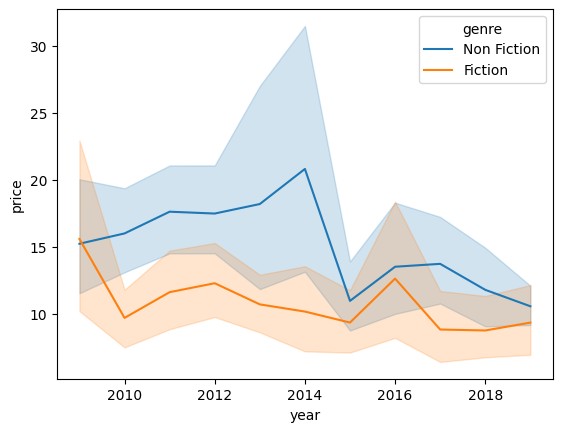

In [45]:
import seaborn as sns

%matplotlib inline

sns.lineplot(x='year', y='price', hue='genre', data=books)

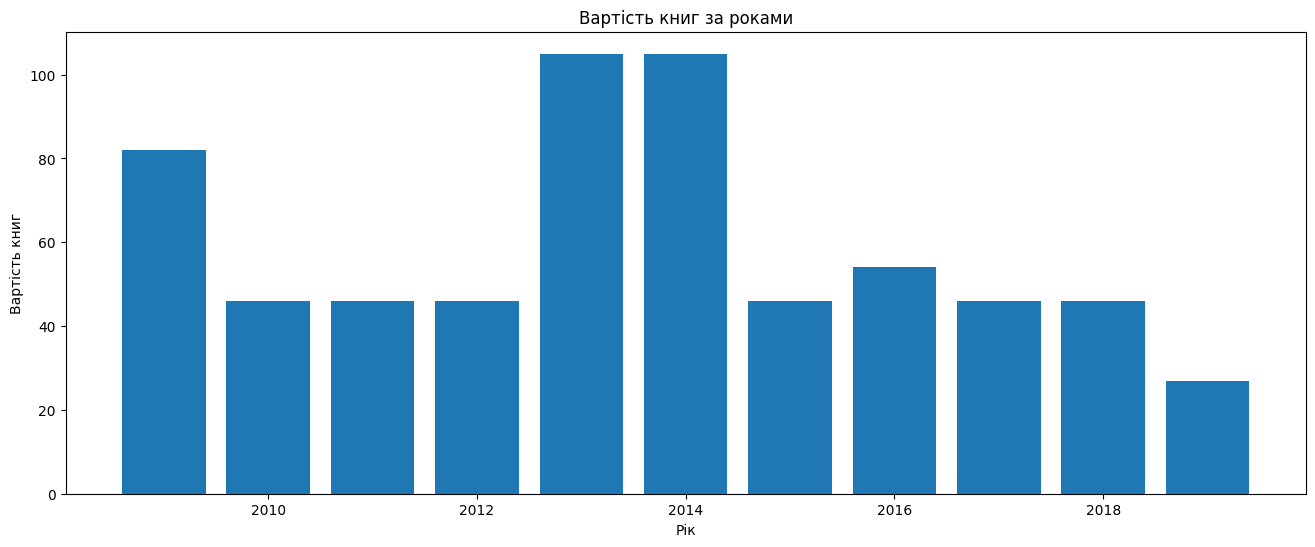

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(16, 6))
plt.bar(books['year'], books['price'])
plt.title('Вартість книг за роками')
plt.xlabel('Рік')
plt.ylabel('Вартість книг')
plt.show()

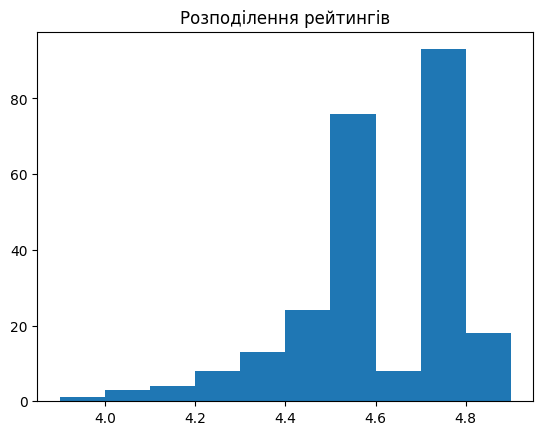

In [47]:
import matplotlib.pyplot as plt

# Дані для графіка
data = sorted_summary['avg_rating']


# Побудова графіка
plt.hist(data, bins=10)

# Оформлення графіка
plt.title('Розподілення рейтингів')

# Відображення графіка
plt.show()

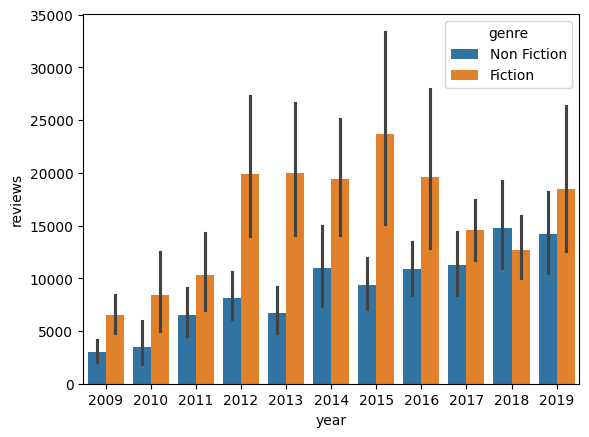

In [48]:
import seaborn as sns


sns.barplot(books, y="reviews", x="year", hue="genre")

plt.show()